In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task3-aqi.ipynb")

ModuleNotFoundError: No module named 'otter'

# Task 3: Visualizing AQI during the 2017 Thomas Fire in Santa Barbara County

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/silkieMoth/eds220-hwk2.git


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## About the data

In this task you will use [Air Quality Index (AQI)](https://www.airnow.gov/aqi/aqi-basics/) data from the [US Environmental Protection Agency](https://www.epa.gov) to visualize the impact on the AQI of the 2017 [Thomas Fire](https://en.wikipedia.org/wiki/Thomas_Fire) in Santa Barbara County.

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

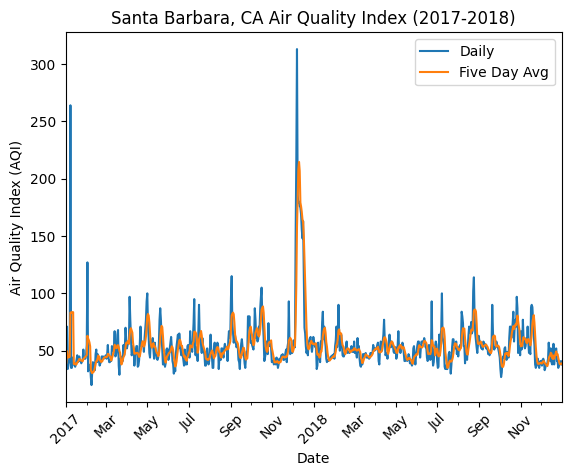

In [17]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.dates as mdates

# Read in data
url_17 = "https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip"
url_18 = "https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip"

aqi_17 = pd.read_csv(url_17, compression = 'zip')
aqi_18 = pd.read_csv(url_18, compression = 'zip')

# Append 2018 air quality data to 2017 data
aqi = pd.concat([aqi_17, aqi_18])

# Simplify column names
aqi.columns = (aqi.columns
                  .str.lower()
                  .str.replace(' ','_')
                )

# Subset for data in Santa Barbara and drop unneeded cols
aqi_sb = (aqi[aqi['county_name'] == 'Santa Barbara']
          .drop(['state_name', 'county_name', 'state_code', 'county_code'], axis = 1))

# Convert 'date' col to datetime
aqi_sb.date = pd.to_datetime(arg = aqi_sb.date)

# Set 'date' col as index
aqi_sb = aqi_sb.set_index('date')

# Calculate AQI rolling average over 5 days
rolling_average = aqi_sb.aqi.rolling('5D').mean()

# Add rolling mean column to air quality df
aqi_sb['five_day_average'] = rolling_average

# Plot the base line graph
ax = aqi_sb.plot.line(use_index = True,
                     y = ['aqi', 'five_day_average'],
                     ylabel = 'Air Quality Index (AQI)',
                     xlabel = 'Date',
                     title = "Santa Barbara, CA Air Quality Index (2017-2018)")

# Write in legend labels
ax.legend(['Daily', 'Five Day Avg'])

# Rotate tick labels 45 degrees
ax.set_xticks(ax.get_xticks()) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Set x-axis for every other month
fter = mdates.AutoDateLocator(maxticks = 20)
ax.xaxis.set_major_locator(fter)
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(fter))   

plt.show()


## 1

a. Read the [Air Quality Index (AQI) Basics](https://www.airnow.gov/aqi/aqi-basics/) from the AirNow.gov portal.

b. Go to [EPA's website on Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 

c. Under "Donwload Data", click on "Pre-generated Data Files".

d. Read the "About the data" section.

## 2
a. Back in the "Pre-generated Data Files" site, click on "Tables of Daily AQI".

b. Copy the URL to the 2017 Daily AQI **by County** ZIP file `daily_aqi_by_county_2017.zip`

Notice we'll be reding the data directly from its ZIP file link. This ZIP file contains a single CSV that has been compressed to save space. 

<!-- BEGIN QUESTION -->

c. In the next code cell read in the data from the URL using the [`pd.read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function with the `compression='zip'` parameter added and store it as `aqi_17`. 

d. In the same cell, read in the data for the 2018 Daily AQI by County ZIP file and store it as `aqi_18`.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.dates as mdates

# Read in data
url_17 = "https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip"
url_18 = "https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip"

aqi_17 = pd.read_csv(url_17, compression = 'zip')
aqi_18 = pd.read_csv(url_18, compression = 'zip')


<!-- END QUESTION -->

## 3
a. and b. Use the next two code cells to look at the head of both data frames. Store your results in `aqi_17_head` and `aqi_18_head`. 

In [14]:
# a.
aqi_17_head = aqi_17.head()

In [15]:
# b.
aqi_18_head = aqi_18.head()

<!-- BEGIN QUESTION -->

c. Use this code cell to make some other preliminary data exploration of your choosing.

In [5]:
print(f"columns, nulls and data types \n")
aqi_17.info()
aqi_18.info()
print(f'\n')
print(f"unique value counts by variable \n")
['2017',
 aqi_17.nunique(),
 '',
 '2018',
 aqi_18.nunique()]


columns, nulls and data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326801 entries, 0 to 326800
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   State Name                 326801 non-null  object
 1   county Name                326801 non-null  object
 2   State Code                 326801 non-null  int64 
 3   County Code                326801 non-null  int64 
 4   Date                       326801 non-null  object
 5   AQI                        326801 non-null  int64 
 6   Category                   326801 non-null  object
 7   Defining Parameter         326801 non-null  object
 8   Defining Site              326801 non-null  object
 9   Number of Sites Reporting  326801 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 24.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327541 entries, 0 to 327540
Data columns (total 10 columns):
 #   Column            

['2017',
 State Name                     54
 county Name                   796
 State Code                     54
 County Code                   160
 Date                          365
 AQI                           341
 Category                        6
 Defining Parameter              5
 Defining Site                2133
 Number of Sites Reporting      35
 dtype: int64,
 '',
 '2018',
 State Name                     54
 county Name                   793
 State Code                     54
 County Code                   160
 Date                          365
 AQI                           300
 Category                        6
 Defining Parameter              5
 Defining Site                2105
 Number of Sites Reporting      35
 dtype: int64]

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

d. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

With a combination of `info()` and `unique()`, I get all the information I need to get a basic understanding of the variables I'm working with. I can see that:
 - there are zero null values to mess up my analysis
 - the data types, which tells me what types of analysis I can do on which variable
 - which variables are likely categorical and which are likely numeric
 - which variables in which I might need to edit the data type of

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 4
We currently have two separate data frames. For this exercise we will need to "glue" them one on top of the other. The `pandas` function `pd.concat()` can achieve this. 

Pass `[aqi_17, aqi_18]` as the input of `pd.concat()` and store the output as  `aqi`.  
In the next line run `aqi`.

NOTE: When we concatenate data frames like this, without any extra parameters for `pd.concat()` the indices for the two dataframes are just "glued together", the index of the resulting dataframe is not updated to start from 0. Notice the mismatch between the index of `aqi` and the number of rows i the complete data frame.


In [6]:
# Append 2018 air quality data to 2017 data
aqi = pd.concat([aqi_17, aqi_18])
aqi

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,28,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,29,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,25,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,40,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,22,Good,PM2.5,01-003-0010,1
...,...,...,...,...,...,...,...,...,...,...
327536,Wyoming,Weston,56,45,2018-12-27,36,Good,Ozone,56-045-0003,1
327537,Wyoming,Weston,56,45,2018-12-28,35,Good,Ozone,56-045-0003,1
327538,Wyoming,Weston,56,45,2018-12-29,35,Good,Ozone,56-045-0003,1
327539,Wyoming,Weston,56,45,2018-12-30,31,Good,Ozone,56-045-0003,1


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 5

Run the following code cell and use the next markdown cell to give a line by line explanation of the code below the comment "#Simplify column names". You might need to look up the `pandas` documentation.

In [7]:
# Initial column names: notice caps and spaces (difficult to work with!)
print(aqi.columns, '\n')

# Simplify column names
aqi.columns = (aqi.columns
                  .str.lower()
                  .str.replace(' ','_')
                )
print(aqi.columns, '\n')

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object') 

Index(['state_name', 'county_name', 'state_code', 'county_code', 'date', 'aqi',
       'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting'],
      dtype='object') 



1. the `.columns` attribute fetches all columns in a data frame
2. `.str` is a prefix that is associated with a variety of methods that edit the strings of a series or index.
2. the `.str.lower()` method converts strings in series or index to all lower case.
3. the `.str.replace()` method finds a specified substring in series or index, and replaces it with another.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 6
In the next code cell:

a. Select only data from `Santa Barbara` county and store it in a new variable `aqi_sb`.

b. Remove the `state_name`, `county_name`, `state_code` and `county_code` columns from `aqi_sb`.

Your dataframe should have the following columns in this order: `date`, `aqi`, `category`, `defining_parameter`, `defining_stie`, `number_of_sites_reporting`. 

In [8]:
# Subset for data in Santa Barbara and drop unneeded cols
aqi_sb = (aqi[aqi['county_name'] == 'Santa Barbara']
          .drop(['state_name', 'county_name', 'state_code', 'county_code'], axis = 1))
aqi_sb

,date,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
28648,2017-01-01,39,Good,Ozone,06-083-4003,12
28649,2017-01-02,39,Good,PM2.5,06-083-2011,11
28650,2017-01-03,71,Moderate,PM10,06-083-4003,12
28651,2017-01-04,34,Good,Ozone,06-083-4003,13
28652,2017-01-05,37,Good,Ozone,06-083-4003,12
...,...,...,...,...,...,...
29128,2018-12-27,37,Good,Ozone,06-083-1025,11
29129,2018-12-28,39,Good,Ozone,06-083-1021,12
29130,2018-12-29,39,Good,Ozone,06-083-1021,12
29131,2018-12-30,41,Good,PM2.5,06-083-1008,12


<!-- END QUESTION -->

 
c. What is the data type of the `date` column? Store your answer in the `date_type` variable. Your answer should contain the type for the **date column only**. 

In [9]:
# Get data type of 'date' col
date_type = aqi_sb['date'].dtypes

<!-- BEGIN QUESTION -->

## 7
In the following cell:
1. Update the date column of `aqi_sb` to be a `pandas.datetime` object.
2. Update the index of `aqi_sb` to be the `date` column.

In [10]:
# Convert 'date' col to datetime
aqi_sb.date = pd.to_datetime(arg = aqi_sb.date)

# Set 'date' col as index
aqi_sb = aqi_sb.set_index('date')
aqi_sb

,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
date,,,,,
2017-01-01,39,Good,Ozone,06-083-4003,12
2017-01-02,39,Good,PM2.5,06-083-2011,11
2017-01-03,71,Moderate,PM10,06-083-4003,12
2017-01-04,34,Good,Ozone,06-083-4003,13
2017-01-05,37,Good,Ozone,06-083-4003,12
...,...,...,...,...,...
2018-12-27,37,Good,Ozone,06-083-1025,11
2018-12-28,39,Good,Ozone,06-083-1021,12
2018-12-29,39,Good,Ozone,06-083-1021,12


<!-- END QUESTION -->

## 8
In the next cell we will calculate an average over a [rolling window](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html) using the `rolling()`method for `pandas.Series`:

- `rolling()` is a lazy method, so we need to specify what we want to calculate over each window before it does something. 
- in this example we use the aggregator function `mean()` to calculate the average over each window
- the parameter '5D' indicates we want the window for our rolling average to be 5 days. 
- we get a `pandas.Series` as ouput

Store your answer in the `rolling_average` variable. You should have two columns in your series, `date` and the averages. 

In [11]:
# Calculate AQI rolling average over 5 days
rolling_average = aqi_sb.aqi.rolling('5D').mean()
rolling_average

date
2017-01-01    39.000000
2017-01-02    39.000000
2017-01-03    49.666667
2017-01-04    45.750000
2017-01-05    44.000000
                ...    
2018-12-27    41.200000
2018-12-28    38.600000
2018-12-29    38.200000
2018-12-30    38.200000
2018-12-31    38.800000
Name: aqi, Length: 730, dtype: float64

## 9 

Without creating any new variables, add the mean of the AQI over a 5-day rolling window as a new column named `five_day_average` to the `aqi_sb` dataframe. 

In [12]:
# Add rolling mean column to air quality df
aqi_sb['five_day_average'] = rolling_average

<!-- BEGIN QUESTION -->

## 10
Make a line plot showing both the daily AQI and the 5-day average (5-day average on top of the AQI). Make necessary updates for the plot to be accurate, informative, and polished, even if simple. You're welcome to use plotting methods and packages beyond what we have covered in class! 

Can you see the AQI going up during the Thomas Fire in December 2017?

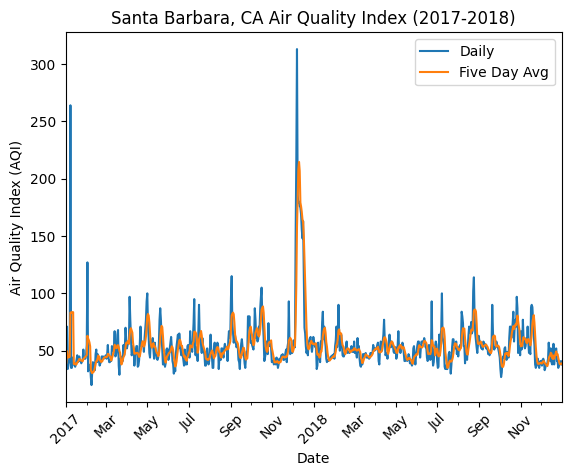

In [18]:
# Plot the base line graph
ax = aqi_sb.plot.line(use_index = True,
                     y = ['aqi', 'five_day_average'],
                     ylabel = 'Air Quality Index (AQI)',
                     xlabel = 'Date',
                     title = "Santa Barbara, CA Air Quality Index (2017-2018)")

# Write in legend labels
ax.legend(['Daily', 'Five Day Avg'])

# Rotate tick labels 45 degrees
ax.set_xticks(ax.get_xticks()) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Set x-axis for every other month
fter = mdates.AutoDateLocator(maxticks = 20)
ax.xaxis.set_major_locator(fter)
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(fter))   

plt.show()

## 10

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).